# 1. Introduction

At many points in your career, you'll need to be able to build complete, end-to-end data science projects on your own. Data science projects usually consist of one of two things:

* An exploration and analysis of a set of data. One example might involve analyzing donors to political campaigns, creating a plot, and then sharing an analysis of the plot with others.
* An operational system that generates predictions based on data that updates continually. An algorithm that pulls in daily stock ticker data and predicts which stock prices will rise and fall would be one example.

You'll find the ability to create data science projects useful in several different contexts:

* Projects will help you build a portfolio, which is critical to finding a job as a data analyst or scientist.
* Working on projects will help you learn new skills and reinforce existing concepts.
* Most "real-world" data science and analysis work consists of developing internal projects.
* Projects allow you to investigate interesting phenomena and satisfy your curiosity.

Here are two ways to go about finding a good topic:

* Think about what sectors or angles you're really interested in, then find data sets relating to those sectors.
* Review several data sets, and find one that seems interesting enough to explore.

Whichever approach you take, you can start your search at these sites:

* [Data.gov](https://www.data.gov/) - A directory of government data downloads
* [/r/datasets](https://reddit.com/r/datasets) - A subreddit that has hundreds of interesting data sets
* [Awesome datasets](https://github.com/caesar0301/awesome-public-datasets) - A list of data sets hosted on GitHub
* [rs.io](http://rs.io/100-interesting-data-sets-for-statistics/) - A great blog post with hundreds of interesting data sets

For the purposes of this project, we'll be using data about New York City public schools, which can be found [here](https://data.cityofnewyork.us/browse?category=Education).

# 2. Finding All of the Relevant Data Sets

Once you've chosen a topic, you'll want to pick an angle to investigate. It's important to choose an angle that has enough depth to analyze, but isn't so complicated that it's difficult to get started. You want to finish the project, and you want your results to be interesting to others.

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between SAT scores and demographics might be an interesting angle to take. We could correlate [SAT scores](https://en.wikipedia.org/wiki/SAT) with factors like race, gender, income, and more.

New York City makes its [data on high school SAT scores](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) available online, as well as the [demographics for each high school](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2). 

The same website has several related data sets covering demographic information and test scores. Here are the links to all of the data sets we'll be using:

* [SAT scores by school](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City
* [School attendance](https://data.cityofnewyork.us/Education/School-Attendance-and-Enrollment-Statistics-by-Dis/7z8d-msnt) - Attendance information for each school in New York City
* [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
* [AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
* [Graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) - The percentage of students who graduated, and other outcome information
* [Demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j) - Demographic information for each school
* [School survey](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) - Surveys of parents, teachers, and students at each school

`All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.`

# 3. Finding Background Information

Before we move into coding, we'll need to do some background research. A thorough understanding of the data will help us avoid costly mistakes, such as thinking that a column represents something other than what it does. Background research will also give us a better understanding of how to combine and analyze the data.

In this case, we'll want to research:

* [New York City](https://en.wikipedia.org/wiki/New_York_City)
* [The SAT](https://en.wikipedia.org/wiki/SAT)
* [Schools in New York City](https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City)
* [Our data](https://data.cityofnewyork.us/browse?category=Education)

We can learn a few different things from these resources. For example:

* Only high school students take the SAT, so we'll want to focus on high schools.
* New York City is made up of five boroughs, which are essentially distinct regions.
* New York City schools fall within several different school districts, each of which can contains dozens of schools.
* Our data sets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
* Each school in New York City has a unique code called a DBN, or district borough number.
* Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.

# 4. Reading in the Data

Once we've done our background research, we're ready to read in the data. For your convenience, we've placed all the data into the schools folder. Here are all of the files in the folder:

* ap_2010.csv - [Data on AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e)
* class_size.csv - [Data on class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3)
* demographics.csv - [Data on demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j)
* graduation.csv - [Data on graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a)
* hs_directory.csv - [A directory of high schools](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2)
* sat_results.csv - [Data on SAT scores](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4)
* survey_all.txt - Data on [surveys](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) from all schools
* survey_d75.txt - Data on [surveys](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8) from New York City [district 75](http://schools.nyc.gov/academics/specialEducation/D75/default.htm)
* survey_all.txt and survey_d75.txt are in more complicated formats than the other files. For now, we'll focus on reading in the CSV files only, and then explore them.

In [1]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]


data = {}
for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    key_name = f.replace(".csv", "")
    data[key_name] = d


# 5. Exploring the SAT Data

What we're mainly interested in is the SAT data set, which corresponds to the dictionary key sat_results. This data set contains the SAT scores for each high school in New York City. We eventually want to correlate selected information from this data set with information in the other data sets.

In [2]:
data['sat_results']

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
...,...,...,...,...,...,...
473,75X012,P.S. X012 LEWIS AND CLARK SCHOOL,s,s,s,s
474,75X754,J. M. RAPPORT SCHOOL CAREER DEVELOPMENT,s,s,s,s
475,79M645,SCHOOL FOR COOPERATIVE TECHNICAL EDUCATION,s,s,s,s
476,79Q950,GED PLUS s CITYWIDE,8,496,400,426


# 6. Exploring the Remaining Data

In [3]:
for k in data:
    print(data[k].head())

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K     

# 7. Reading in the Survey Data

We can make some observations based on the first few rows of each one.

* Each data set appears to either have a DBN column, or the information we need to create one. That means we can use a DBN column to combine the data sets. First we'll pinpoint matching rows from different data sets by looking for identical DBNs, then group all of their columns together in a single data set.
* Some fields look interesting for mapping -- particularly Location 1, which contains coordinates inside a larger string.
* Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means we’ll have to do some preprocessing to ensure that each DBN is unique within each data set. If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.

The files are tab delimited and encoded with Windows-1252 encoding. An encoding defines how a computer stores the contents of a file in binary. The most common encodings are UTF-8 and ASCII. Windows-1252 is rarely used, and can cause errors if we read such a file in without specifying the encoding. If you'd like to read more about encodings, [here's](http://kunststube.net/encoding/) a good primer.

# 8. Reading in the Survey Data

In [4]:
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)

print(survey.head())

      dbn    bn                      schoolname  d75 studentssurveyed  \
0  01M015  M015       P.S. 015 Roberto Clemente    0               No   
1  01M019  M019             P.S. 019 Asher Levy    0               No   
2  01M020  M020            P.S. 020 Anna Silver    0               No   
3  01M034  M034  P.S. 034 Franklin D. Roosevelt    0              Yes   
4  01M063  M063       P.S. 063 William McKinley    0               No   

   highschool                  schooltype  rr_s  rr_t  rr_p  ...  s_q14_2  \
0         0.0           Elementary School   NaN    88    60  ...      NaN   
1         0.0           Elementary School   NaN   100    60  ...      NaN   
2         0.0           Elementary School   NaN    88    73  ...      NaN   
3         0.0  Elementary / Middle School  89.0    73    50  ...      NaN   
4         0.0           Elementary School   NaN   100    60  ...      NaN   

   s_q14_3  s_q14_4  s_q14_5  s_q14_6  s_q14_7  s_q14_8  s_q14_9  s_q14_10  \
0      NaN      NaN 

# 9. Cleaning Up the Surveys

There are two immediate facts that we can see in the data:

* There are over 2000 columns, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns will make it easier to print the dataframe out and find correlations within it.
* The survey data has a dbn column that we'll want to convert to uppercase (DBN). The conversion will make the column name consistent with the other data sets.

First, we'll need to filter the columns to remove the ones we don't need. Luckily, there's a data dictionary at the [original data download location](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8). The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.

In [5]:
survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

print(survey.head())

      DBN  rr_s  rr_t  rr_p    N_s   N_t    N_p  saf_p_11  com_p_11  eng_p_11  \
0  01M015   NaN    88    60    NaN  22.0   90.0       8.5       7.6       7.5   
1  01M019   NaN   100    60    NaN  34.0  161.0       8.4       7.6       7.6   
2  01M020   NaN    88    73    NaN  42.0  367.0       8.9       8.3       8.3   
3  01M034  89.0    73    50  145.0  29.0  151.0       8.8       8.2       8.0   
4  01M063   NaN   100    60    NaN  23.0   90.0       8.7       7.9       8.1   

   ...  eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0  ...       7.6       7.9       NaN       NaN       NaN       NaN   
1  ...       8.9       9.1       NaN       NaN       NaN       NaN   
2  ...       6.8       7.5       NaN       NaN       NaN       NaN   
3  ...       6.8       7.8       6.2       5.9       6.5       7.4   
4  ...       7.8       8.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11  
0         8.0         7.7         7.5   

# 10. Inserting DBN Fields

From looking at these rows, we can tell that the DBN in the sat_results data is just a combination of the CSD and SCHOOL CODE columns in the class_size data. The main difference is that the DBN is padded, so that the CSD portion of it always consists of two digits. That means we'll need to add a leading 0 to the CSD if the CSD is less than two digits long. Here's a diagram illustrating what we need to do:

`DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL
2  01M450                     EAST SIDE COMMUNITY SCHOOL`

Once we've padded the CSD, we can use the addition operator (+) to combine the values in the CSD and SCHOOL CODE columns. Here's an example of how we would do this:

`dataframe["new_column"] = dataframe["column_one"] + dataframe["column_two"]`

# 11. Inserting DBN Fields

In [6]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    return str(num).zfill(2)
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
print(data["class_size"].head())

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \


# 12. Combining the SAT Scores

Before we can generate this column, we'll need to convert the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score columns in the sat_results data set from the object (string) data type to a numeric data type. We can use the pandas.to_numeric() method for the conversion. If we don't convert the values, we won't be able to add the columns together.

`It's important to pass the keyword argument errors="coerce" when we call pandas.to_numeric(), so that pandas treats any invalid strings it can't convert to numbers as missing values instead.`

In [27]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


# 13. Parsing Geographic Coordinates for Schools


Next, we'll want to parse the latitude and longitude coordinates for each school. This will enable us to map the schools and uncover any geographic patterns in the data.

In [8]:
import re
def find_lat(loc):
    coords = re.findall("\(.+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)

print(data["hs_directory"].head())

      dbn                                        school_name    borough  \
0  27Q260          Frederick Douglass Academy VI High School     Queens   
1  21K559        Life Academy High School for Film and Music   Brooklyn   
2  16K393     Frederick Douglass Academy IV Secondary School   Brooklyn   
3  08X305                               Pablo Neruda Academy      Bronx   
4  03M485  Fiorello H. LaGuardia High School of Music & A...  Manhattan   

  building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
0          Q465  718-471-2154  718-471-2890             9.0              12   
1          K400  718-333-7750  718-333-7775             9.0              12   
2          K026  718-574-2820  718-574-2821             9.0              12   
3          X450  718-824-1682  718-824-1663             9.0              12   
4          M485  212-496-0700  212-724-5748             9.0              12   

   expgrade_span_min  expgrade_span_max  ... priority10  \
0              

# 14. Extracting the Longitude

In [9]:
import re
def find_lon(loc):
    coords = re.findall("\(.+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

print(data["hs_directory"].head())

      dbn                                        school_name    borough  \
0  27Q260          Frederick Douglass Academy VI High School     Queens   
1  21K559        Life Academy High School for Film and Music   Brooklyn   
2  16K393     Frederick Douglass Academy IV Secondary School   Brooklyn   
3  08X305                               Pablo Neruda Academy      Bronx   
4  03M485  Fiorello H. LaGuardia High School of Music & A...  Manhattan   

  building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
0          Q465  718-471-2154  718-471-2890             9.0              12   
1          K400  718-333-7750  718-333-7775             9.0              12   
2          K026  718-574-2820  718-574-2821             9.0              12   
3          X450  718-824-1682  718-824-1663             9.0              12   
4          M485  212-496-0700  212-724-5748             9.0              12   

   expgrade_span_min  expgrade_span_max  ...  \
0                NaN      

We're almost ready to combine our data sets! We've come a long way in this mission -- we've gone from choosing a topic for a project to acquiring the data to having clean data that we're almost ready to combine.

Along the way, we've learned how to:

* Handle files with different formats and columns
* Prepare to merge multiple files
* Use text processing to extract coordinates from a string
* Convert columns from strings to numbers

# #2.Data Cleaning Walkthrough_Combining the Data

# 1. Introduction


In the last mission, we began investigating possible relationships between SAT scores and demographic factors. In order to do this, we acquired several data sets about New York City public schools. We manipulated these data sets, and found that we could combine them all using the DBN column. All of the data sets are currently stored as keys in the data dictionary. Each individual data set is a pandas dataframe.

In this mission, we'll clean the data a bit more, then combine it. Finally, we'll compute correlations and perform some analysis.

The first thing we'll need to do in preparation for the merge is condense some of the data sets. In the last mission, we noticed that the values in the DBN column were unique in the sat_results data set. Other data sets like class_size had duplicate DBN values, however.

We'll need to condense these data sets so that each value in the DBN column is unique. If not, we'll run into issues when it comes time to combine the data sets.

While the main data set we want to analyze, sat_results, has unique DBN values for every high school in New York City, other data sets aren't as clean. A single row in the sat_results data set may match multiple rows in the class_size data set, for example. This situation will create problems, because we don't know which of the multiple entries in the class_size data set we should combine with the single matching entry in sat_results

# 2. Condensing the Class Size Data Set

`As you can see, the first few rows all pertain to the same school, which is why the DBN appears more than once. It looks like each school has multiple values for GRADE, PROGRAM TYPE, CORE SUBJECT (MS CORE and 9-12 ONLY), and CORE COURSE (MS CORE and 9-12 ONLY).

If we look at the unique values for GRADE, we get the following:

`array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)`

Because we're dealing with high schools, we're only concerned with grades 9 through 12. That means we only want to pick rows where the value in the GRADE column is 09-12.

If we look at the unique values for PROGRAM TYPE, we get the following:

`array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)`

Each school can have multiple program types. Because GEN ED is the largest category by far, let's only select rows where PROGRAM TYPE is GEN ED.`

# 3. Condensing the Class Size Data Set

In [10]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]


data = {}
for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    key_name = f.replace(".csv", "")
    data[key_name] = d


In [11]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
print(class_size.head())

     CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   

    GRADE  PROGRAM TYPE CORE SUBJECT (MS CORE and 9-12 ONLY)  \
225  09-12       GEN ED                              ENGLISH   
226  09-12       GEN ED                              ENGLISH   
227  09-12       GEN ED                              ENGLISH   
228  09-12       GEN ED                              ENGLISH   
229  09-12       GEN ED                                 MATH   

    CORE COURSE (MS CORE and 9-12 ONLY) SERVICE CATEGORY(K-9* ONLY)  \
225                           English 9                           -  

# 4. Computing Average Class Sizes

After we group a dataframe and aggregate data based on it, the column we performed the grouping on (in this case DBN) will become the index, and will no longer appear as a column in the data itself. To undo this change and keep DBN as a column, we'll need to use pandas.DataFrame.reset_index(). This method will reset the index to a list of integers and make DBN a column again.

# 5. Computing Average Class Sizes

In [12]:

all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)

print(survey.head())

      dbn    bn                      schoolname  d75 studentssurveyed  \
0  01M015  M015       P.S. 015 Roberto Clemente    0               No   
1  01M019  M019             P.S. 019 Asher Levy    0               No   
2  01M020  M020            P.S. 020 Anna Silver    0               No   
3  01M034  M034  P.S. 034 Franklin D. Roosevelt    0              Yes   
4  01M063  M063       P.S. 063 William McKinley    0               No   

   highschool                  schooltype  rr_s  rr_t  rr_p  ...  s_q14_2  \
0         0.0           Elementary School   NaN    88    60  ...      NaN   
1         0.0           Elementary School   NaN   100    60  ...      NaN   
2         0.0           Elementary School   NaN    88    73  ...      NaN   
3         0.0  Elementary / Middle School  89.0    73    50  ...      NaN   
4         0.0           Elementary School   NaN   100    60  ...      NaN   

   s_q14_3  s_q14_4  s_q14_5  s_q14_6  s_q14_7  s_q14_8  s_q14_9  s_q14_10  \
0      NaN      NaN 

In [13]:
survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

print(survey.head())

      DBN  rr_s  rr_t  rr_p    N_s   N_t    N_p  saf_p_11  com_p_11  eng_p_11  \
0  01M015   NaN    88    60    NaN  22.0   90.0       8.5       7.6       7.5   
1  01M019   NaN   100    60    NaN  34.0  161.0       8.4       7.6       7.6   
2  01M020   NaN    88    73    NaN  42.0  367.0       8.9       8.3       8.3   
3  01M034  89.0    73    50  145.0  29.0  151.0       8.8       8.2       8.0   
4  01M063   NaN   100    60    NaN  23.0   90.0       8.7       7.9       8.1   

   ...  eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0  ...       7.6       7.9       NaN       NaN       NaN       NaN   
1  ...       8.9       9.1       NaN       NaN       NaN       NaN   
2  ...       6.8       7.5       NaN       NaN       NaN       NaN   
3  ...       6.8       7.8       6.2       5.9       6.5       7.4   
4  ...       7.8       8.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11  
0         8.0         7.7         7.5   

In [14]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    return str(num).zfill(2)
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
print(data["class_size"].head())

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \


In [15]:
import numpy as np
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data["Class_size"] = class_size

# 6. Condensing the Demographics Data Set
Now that we've finished condensing class_size, let's condense demographics. The first few rows look like this:

In [16]:
data['demographics'].head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2


 In this case, the only column that prevents a given DBN from being unique is schoolyear. We only want to select rows where schoolyear is 20112012. This will give us the most recent year of data, and also match our SAT results data.

# 7. Condensing the Demographics Data Set

In [17]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
print(data["demographics"].head())

       DBN                                              Name  schoolyear  \
6   01M015  P.S. 015 ROBERTO CLEMENTE                           20112012   
13  01M019  P.S. 019 ASHER LEVY                                 20112012   
20  01M020  PS 020 ANNA SILVER                                  20112012   
27  01M034  PS 034 FRANKLIN D ROOSEVELT                         20112012   
35  01M063  PS 063 WILLIAM MCKINLEY                             20112012   

   fl_percent  frl_percent  total_enrollment prek    k grade1 grade2  ...  \
6         NaN         89.4               189   13   31     35     28  ...   
13        NaN         61.5               328   32   46     52     54  ...   
20        NaN         92.5               626   52  102    121     87  ...   
27        NaN         99.7               401   14   34     38     36  ...   
35        NaN         78.9               176   18   20     30     21  ...   

   black_num black_per hispanic_num hispanic_per white_num white_per male_num  \

# 8. Condensing the Graduation Data Set

The Demographic and Cohort columns are what prevent DBN from being unique in the graduation data. A Cohort appears to refer to the year the data represents, and the Demographic appears to refer to a specific demographic group. In this case, we want to pick data from the most recent Cohort available, which is 2006. We also want data from the full cohort, so we'll only pick rows where Demographic is Total Cohort.



# 9. Condensing the Graduation Data Set


In [18]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
print(data["graduation"].head())

     Demographic     DBN                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   
31  Total Cohort  01M515  LOWER EAST SIDE PREPARATORY HIGH SCHO   2006   

    Total Cohort Total Grads - n  Total Grads - % of cohort Total Regents - n  \
3             78              43                       55.1                36   
10           124              53                       42.7                42   
17            90              70                       77.8                67   
24            84              47                       56.0                40   
31           193             105                       54.4                91   

    Total Regents - % of cohort  Total Regents - % of grads  ...  \


# 10. Converting AP Test Scores

We're almost ready to combine all of the data sets. The only remaining thing to do is convert the Advanced Placement (AP) test scores from strings to numeric values. High school students take the AP exams before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

In [19]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")
    
print(data["ap_2010"].dtypes)

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object


# 11. Left, Right, Inner, and Outer Joins

Before we merge our data, we'll need to decide on the merge strategy we want to use. We'll be using the pandas pandas.DataFrame.merge() function, which supports four types of joins -- left, right, inner, and outer. Each of these join types dictates how pandas combines the rows.

We'll be using the DBN column to identify matching rows across data sets. In other words, the values in that column will help us know which row from the first data set to combine with which row in the second data set.

There may be DBN values that exist in one data set but not in another. This is partly because the data is from different years. Each data set also has inconsistencies in terms of how it was gathered. Human error (and other types of errors) may also play a role. Therefore, we may not find matches for the DBN values in sat_results in all of the other data sets, and other data sets may have DBN values that don't exist in sat_results.

We'll merge two data sets at a time. For example, we'll merge sat_results and hs_directory, then merge the result with ap_2010, then merge the result of that with class_size. We'll continue combining data sets in this way until we've merged all of them. Afterwards, we'll have roughly the same number of rows, but each row will have columns from all of the data sets.

# 12. Performing the Left Joins

In [29]:
combined = data['sat_results']
print(combined.columns)
combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")
print(combined.head(5))
print(combined.shape)

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score', 'sat_score'],
      dtype='object')
      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                      7                            414.0   
4                     44                            390.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0

# 13. Performing the Inner Joins


Now that we've performed the left joins, we still have to merge class_size, demographics, survey, and hs_directory into combined. Because these files contain information that's more valuable to our analysis and also have fewer missing DBN values, we'll use the inner join type.



In [30]:
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

print(combined.head(5))
print(combined.shape)


      DBN                                  SCHOOL NAME_x  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
2  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
3  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
4  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     29                            355.0   
2                     29                            355.0   
3                     29                            355.0   
4                     29                            355.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score SchoolName  \
0                404.0                   363.0     1122.0        NaN   
1                404.0                   363.0     1122.0        NaN   
2                404.0                   363.0     1122.

# 14. Filling in Missing Values


We can fill in missing data in pandas using the pandas.DataFrame.fillna() method. This method will replace any missing values in a dataframe with the values we specify. We can compute the mean of every column using the pandas.DataFrame.mean() method. If we pass the results of the df.mean() method into the df.fillna() method, pandas will fill in the missing values in each column with the mean of that column.



# 15. Filling in Missing Values

In [31]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

print(combined.head(5))

      DBN                                  SCHOOL NAME_x  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
2  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
3  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
4  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     29                            355.0   
2                     29                            355.0   
3                     29                            355.0   
4                     29                            355.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score SchoolName  \
0                404.0                   363.0     1122.0          0   
1                404.0                   363.0     1122.0          0   
2                404.0                   363.0     1122.

# 16. Adding a School District Column for Mapping


We've finished cleaning and combining our data! We now have a clean data set on which we can base our analysis. Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district is just the first two characters of the DBN. We can apply a function over the DBN column of combined that pulls out the first two letters.


In [32]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)
print(combined["school_dist"].head())

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object


We now have a clean data set we can analyze! We've done a lot in this mission. We've gone from having several messy sources to one clean, combined, data set that's ready for analysis.

Along the way, we've learned about:

* How to handle missing values
* Different types of merges
* How to condense data sets
* How to compute averages across dataframes

# #3.Data Cleaning Walkthrough_Analyzing and Visualizing the Data

# 1. Introduction
Over the last two missions, we began investigating possible relationships between SAT scores and demographics. In order to do this, we acquired several data sets containing information about New York City public schools. We cleaned them, then combined them into a single data set named combined that we're now ready to analyze and visualize.

In this mission, we'll discover correlations, create plots, and then make maps. The first thing we'll do is find any correlations between any of the columns and sat_score. This will help us determine which columns might be interesting to plot out or investigate further. Afterwards, we'll perform more analysis and make maps using the columns we've identified.

# 2. Finding Correlations With the r Value
Correlations tell us how closely related two columns are. We'll be using the r value, also called Pearson's correlation coefficient, which measures how closely two sequences of numbers are correlated.

An r value falls between -1 and 1. The value tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1 the r value is, the stronger the positive correlation between the two columns. The closer to -1 the r value is, the stronger the negative correlation (i.e., the more "opposite" the columns are). The closer to 0, the weaker the correlation.

We can use the pandas pandas.DataFrame.corr() method to find correlations between columns in a dataframe. The method returns a new dataframe where the index for each column and row is the name of a column in the original data set.

# 3. Finding Correlations With the r Value

In [33]:
correlations = combined.corr()
correlations = correlations['sat_score']
print(correlations)

SAT Critical Reading Avg. Score    0.985064
SAT Math Avg. Score                0.971335
SAT Writing Avg. Score             0.985410
sat_score                          1.000000
AP Test Takers                     0.533656
                                     ...   
Community Board                   -0.026862
Council District                  -0.042609
Census Tract                       0.064458
BIN                                0.095873
BBL                                0.089310
Name: sat_score, Length: 83, dtype: float64


# 4.Plotting Enrollment With the Plot() Accessor

Unsurprisingly, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, and sat_score are strongly correlated with sat_score.


We can plot columns in a dataframe using the `pandas.DataFrame.plot()` accessor on a dataframe. We can also specify a certain plot type. For example, df.plot.scatter(x="A", y="b") will create a scatterplot of columns A and B.

# 5. Plotting Enrollment With the Plot() Accessor

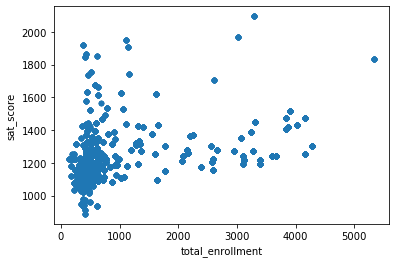

In [34]:
import matplotlib.pyplot as plt
combined.plot.scatter(x='total_enrollment', y='sat_score')
plt.show()

# 6. Exploring Schools With Low SAT Scores and Enrollment

In [35]:
low_enrollment = combined[combined["total_enrollment"] < 1000]
low_enrollment = low_enrollment[low_enrollment["sat_score"] < 1000]
print(low_enrollment["School Name"])

2227      INTERNATIONAL COMMUNITY HIGH SCHOOL
2228      INTERNATIONAL COMMUNITY HIGH SCHOOL
2229      INTERNATIONAL COMMUNITY HIGH SCHOOL
2230      INTERNATIONAL COMMUNITY HIGH SCHOOL
2231      INTERNATIONAL COMMUNITY HIGH SCHOOL
                        ...                  
7834    PAN AMERICAN INTERNATIONAL HIGH SCHOO
7835    PAN AMERICAN INTERNATIONAL HIGH SCHOO
7836    PAN AMERICAN INTERNATIONAL HIGH SCHOO
7837    PAN AMERICAN INTERNATIONAL HIGH SCHOO
7838    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, Length: 194, dtype: object


# 7. Plotting Language Learning Percentage


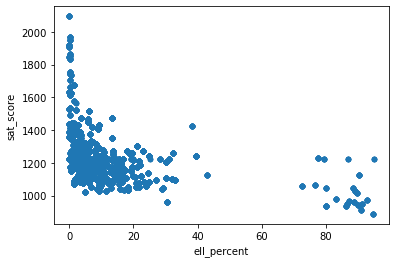

In [36]:
combined.plot.scatter(x='ell_percent', y='sat_score')
plt.show()

# 8. Mapping the Schools With Basemap

It looks like ell_percent correlates with sat_score more strongly, because the scatterplot is more linear. However, there's still the cluster of schools that have very high ell_percent values and low sat_score values. This cluster represents the same group of international high schools we investigated earlier.

In order to explore this relationship, we'll want to map out ell_percent by school district. The map will show us which areas of the city have a lot of English language learners.

# 9.Mapping the Schools With Basemap

C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


KeyError: 'lon'

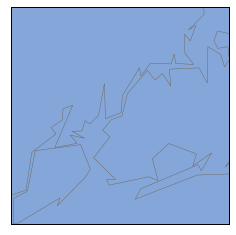

In [42]:
import os
os.environ['PROJ_LIB']='C:\\Users\\krishna\\Anaconda3\\pkgs\\proj4-5.2.0-ha925a31_1\\Library\\share'

from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)
plt.show()

#  10.Plotting Out Statistics

C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


KeyError: 'lon'

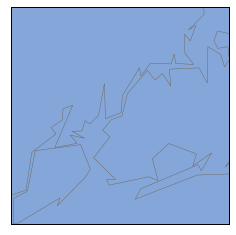

In [43]:
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined["ell_percent"], cmap="summer")
plt.show()

# 11. Calculating District-Level Statistics

In [39]:
import numpy
districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)
print(districts.head())

  school_dist  SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0          01                       416.851852           453.994709   
1          02                       427.090044           444.347211   
2          03                       417.139928           425.092883   
3          04                       407.928571           425.384615   
4          05                       417.876770           427.782258   

   SAT Writing Avg. Score    sat_score  AP Test Takers   Total Exams Taken  \
0              414.645503  1285.492063       114.249590         167.693540   
1              424.436722  1295.873977       122.027548         187.634425   
2              415.933014  1258.165826       135.792675         207.962254   
3              410.780220  1244.093407       145.124099         202.219686   
4              410.412419  1256.071447        82.271760         109.913648   

   Number of Exams with scores 3 4 or 5  Total Cohort  \
0                            131.078970     86.

# 12. Plotting Percent Of English Learners by District

C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


KeyError: 'lon'

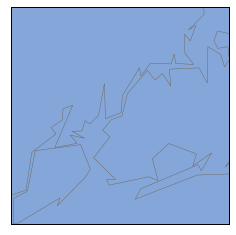

In [44]:
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["ell_percent"], cmap="summer")
plt.show()